# 2.2.5 Probabilidad condicional, Naive Bayes y Clasificadores de Texto

Los clasificadores bayesianos ingenuos son un tipo de clasificador probabilistico en el que se considera que cada característica de una instancia contribuye independientemente de las demás a que un objeto pertenezca a una clase determinada. Mientras que en la inducción de reglas de asociación (algoritmo 1R) solamente se considera una sola característica para determinar a que clase pertence una instancia, en un clasificador ingenuo se consideran simultáneamente todas las características. En este tutorial se describen los fundamentos matemáticos en que se soporta este tipo de clasificadores y como se aplican a casos reales.

## Definición del problema

En este tutorial se aborda el problema de determinar si un mensaje de texto es válido o spam. Este es un problema típico de minería de texto. Desde el punto de vista del negocio, la recepción de publicidad no deseada y mensajes fraudulentos es un problema que afecta a muchos usuarios; y es por ello, que las compañias prestadoras de servicios desean filtrar este tipo de mensajes con el fin de evitar el consumo de espacio en su infraestructura y la molestia para el usuario.

Se tiene una muestra conformada por los siguientes mensajes:

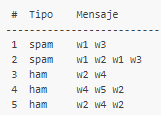


El problema en términos de los datos consiste en clasificar si un mensaje SMS es legítimo o spam, a partir del análisis de las palabras que contiente; se supone que ciertas palabras que son más frecuentes dependiendo del tipo de mensaje.

## Conceptos y Definiciones Básicas

### Probabilidad

De los tutoriales anteriores, se sabe que si las variables xi representan los eventos posibles, entonces:

- Todas las probabilidades deben estar entre 0 y 1:

$0≤Pr(xi)≤1$

- Las probabilidades de eventos mutuamente exclusivos (no pueden ocurrir simultáneamente) y colectivamente exhaustivos (cubren todo el universo de casos posibles) deben sumar la unidad:


$∑{i=1,n}Pr(xi)=1$

- En las siguientes figuras, los eventos F1, F2 y F3, y V1 y V2 están definidos sobre el mismo universo; y son mutuamente exclusivos y colectivamente exhaustivos, tal que se cumplen las dos propiedades anteriores

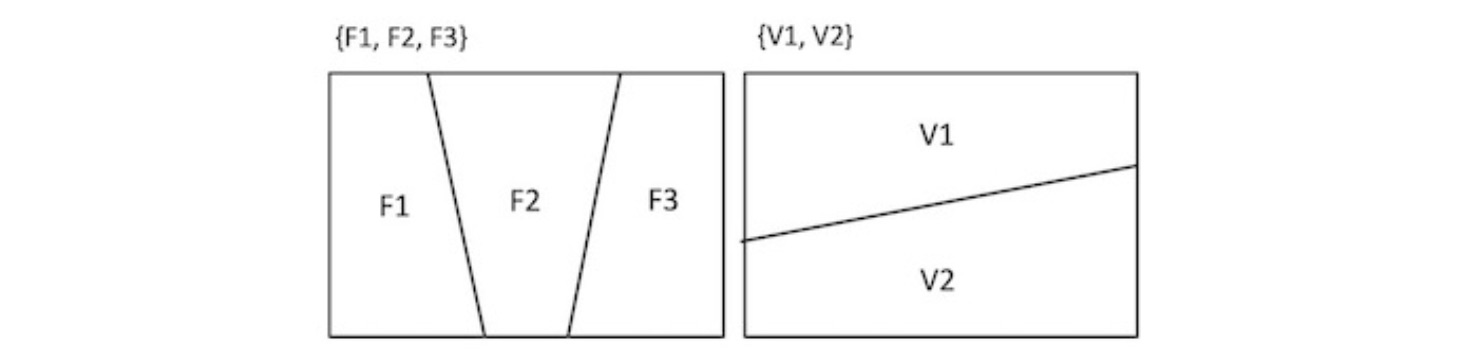

Pr(F1)+Pr(F2)+Pr(F3)=1,Pr(V1)+Pr(V2)=1

### Probabilidad conjunta

Los eventos considerados ocurren simultáneamente. En la siguiente figura, los eventos F1 y V2 ocurren simultáneamente (área sombreada de la figura), tal que su probabilidad conjunta es:

$$
\begin{align}

Pr(F1 && and && V2)

\end{align}
$$

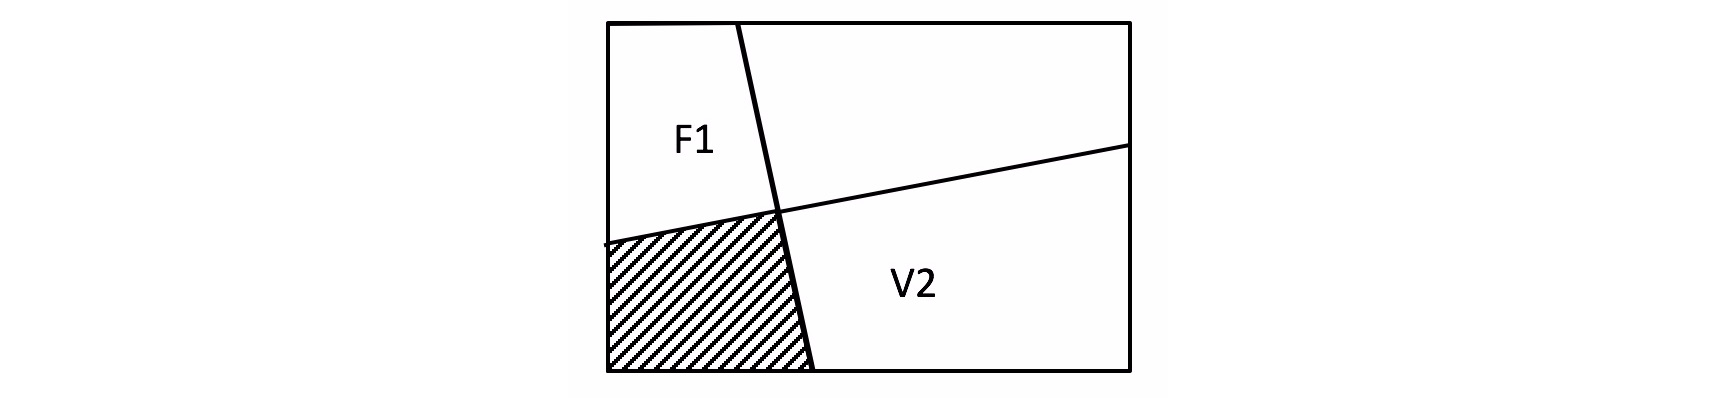

### Probabilidad condicional

Es la probabilidad de que ocurra un evento sabiendo que el otro ya ocurrio. En la siguiente figura el evento V2 es condicionar a la ocurrencia F1. Noté que en la siguiente figura, el universo no es el rectángulo anterior que cubre todos los eventos, si no el evento F1. De esta forma, la probabilidad condicional es sólo la proporción de V2 que se intercepta con F1, la cual corresponde a la porción sombreada de la figura de abajo. La siguiente expresión matemática permite calcular la probabilidad condicional en términos de la probabilidad conjunta.

$$
\begin{align}

Pr(V2|F1)=Pr(F1 && and && V2)/Pr(F1)

\end{align}
$$

En otras palabras,

$$
\begin{align}

Pr(A|B)∗Pr(B)=Pr(A && and && B)

\end{align}
$$

para dos eventos A y B.

- image faltante

### Independencia

Si los eventos A y B son independientes, la probabilidad condicional del evento A dado que ocurrio el evento B es igual a la probabilidad del evento A:

$$
\begin{align}

Pr(A|B)=Pr(A)

\end{align}
$$

De la definición de probabilidad condicional:

$$
\begin{align}

Pr(A|B)=Pr(A)=Pr(A && and && B)Pr(B)

\end{align}
$$

Entonces:

$$
\begin{align}

Pr(A && and && B)=Pr(A)∗Pr(B)

\end{align}
$$

### Probabilidad marginal

Sea $X_1$ con i=1,...,n , un conjunto de eventos mutuamente exclusivos y colectivamente exhaustivos. La probabilidad de un evento A es:

$$
\begin{align}

Pr(A)=∑_{i=1}^nPr(A && and && X_i)

\end{align}
$$

En la siguiente figura se puede observar que para cualquiera de los tres eventos $F_j$ (para j=1,2,3)

$$
\begin{align}

Pr(F_j)=Pr(F_j && and && V1)+Pr(F_j && and && V2)

\end{align}
$$

y que para los dos eventos $V_i$ (i=1,2):

$$
\begin{align}

Pr(V_i)=Pr(V_i && and && F1)+Pr(V_i && and && F2)+Pr(V_i && and && F3)

\end{align}
$$

### Unión (OR)

Para dos eventos A y B:



$$
\begin{align}

Pr(A && or && B)=Pr(A)+Pr(B)−Pr(A && and && B)

\end{align}
$$

En la figura de abajo se observa que al unir las regiones de los eventos F1 y V2, las áreas se traslapan y por tanto hay que restar la intersección.

![Alt text](image.png)

### Complemento o negación

$$
\begin{align}

Pr(not && A)=1−Pr(A)

\end{align}
$$

### Probabilidad total

La probabilidad total indica que la probabilidad de un evento A puede calcularse como la probabilidad de que ocurran los eventos A y B simultáneamente más la probabilidad de que ocurran los evento A y not B (el complemento de B):

$$
\begin{align}

Pr(A)=Pr(A && and && B)+Pr(A && and && not && B)

\end{align}
$$

Para la siguiente figura:

$$
\begin{align}

Pr(V2)=Pr(V2 && and && F1)+Pr(V2 && and && not && F1)=Pr(V2 && and && F1)+Pr(V2 && and && (F2∪F3))

\end{align}
$$

![Alt text](image-1.png)

La ecuación anterior puede expresarse en términos de probabilidades condicionales, tal que:

$$
\begin{align}

Pr(A)=Pr(A|B)Pr(B)+Pr(A|not B) Pr(not B)

\end{align}
$$

### Teorema de Bayes

A partir de:

$$
\begin{align}

Pr(A|B)=\frac{Pr(A \quad and \quad B)}{Pr(B)}

\end{align}
$$

$$
\begin{align}

Pr(B|A)=\frac{Pr(A \quad and \quad B)}{Pr(A)}

\end{align}
$$

Se obtiene que:

$$
\begin{align}

Pr(A|B) Pr(B)=\frac{Pr(B|A)}{Pr(A)}

\end{align}
$$

Despejando Pr(B|A),

$$
\begin{align}

Pr(B|A) = \frac{Pr(A|B)Pr(B)}{Pr(A)} = \frac{Pr(A|B) Pr(B)}{Pr(A|B)Pr(B)+Pr(A|not B)Pr(not B)}

\end{align}
$$

En la última ecuación, se aplica el teorema de probabilidad total para el evento A.

Ejercicio: Complete las siguientes tablas de probabilidades:

|    v   |  F1  |  F2  |  F3  | Prob(V) |
|--------|------|------|------|-------- | 
|    V1  | 0.10 | 0.25 | 0.03 |   0.38  |
|    V2  | 0.22 | 0.26 | 0.14 |   0.62  |
| Prob(F)| 0.32 | 0.51 | 0.17 |   1.0   |

Probabilidades condicionales:

Prob(F|V) 

|    |    F1 |   F2 |   F3|
|----|-------|------|-----|
|  V1| 10/38 |    ? |    ?|
|  V2|     ? |    ? |14/62|

Prob(V|F)

|      |  F1 |   F2 |  F3|
|------|-----|------|----|
|  V1  |   ? |25/51 |   ?|
|  V2  |   ? |    ? |   ?|

Ejercicio 2: En términos del problema de filtrado de mensajes de texto, V1 se interpreta como “Es spam” y V2 como NOT “Es spam”, ya que son eventos mutuamente exclusivos y colectivamente exhaustivos. Si F es la ocurrencia de una determinada palabra en el texto, como por ejemplo “Viagra”, entonces F1 sería “Viagra”(“viagra” aparece en el mensaje) y F2 sería NOT “Viagra” (“viagra” no aparece en el mensaje).

De acuerdo con el teorema de Bayes:

$$
\begin{align}

Pr(spam|viagra)=\frac{Pr(viagra|spam)∗Pr(spam)}{Pr(viagra)}

\end{align}
$$

- Pr(spam|viagra) es la probabilidad posterior.
- Pr(viagra|spam) es la verosimilitud.
- Pr(spam) es la probabilidad prior, es decir, la probabilidad de que un mensaje sea spam sin conocer el texto que contiene.
- Pr(viagra)  es la verosimilitud marginal.

El cálculo de cada una de las probabilidades se realiza tal como se hizo en el ejercicio anterior. <br>
Para el caso analizado, se tiene una muestra de ejemplos de mensajes que han sido catalogados como spam y válidos (no spam):

 # | Tipo  |  Mensaje
---|-------|-----------------------------
 1 | spam  |  w1 w3
 2 | spam  |  w1 w2 w1 w3
 
 3 | ham   |  w2 w4
 4 | ham   |  w4 w5 w2
 5 | ham   |  w2 w4 w2

Para realizar la clasificación se tienen cuatro palabras w1, w2, w3, w4 y w5 que pueden estar o no en cada uno de los mensajes de texto. La probabilidad de que la palabra w1 este en el mensaje se nota como Pr(w1), y de que no este como Pr(not w1).

Calcule las tablas de probabilidades:

Probabilidad individual Pr(wi):

![Alt text](image.png)

Probabilidad conjunta Pr(wi,Tipo):

![Alt text](image-1.png)

Probabilidad condicional Pr(wi|Tipo):

![Alt text](image-2.png)

Probabilidad condicional Pr(not wi|Tipo):

![Alt text](image-3.png)

A continuación se usará el teorema de Bayes para determine si el mensaje w1w4 es spam. Ya que este mensaje contiene las palabras w1 y w4 y no contiene las palabras w2, w3 y w5, la probabilidad de que sea spam es:

$$
\begin{align}

Pr(spam | w1 \quad and \quad not \quad w2 \quad and \quad not \quad w3 \quad and \quad w4 \quad and \quad not \quad w5)

\end{align}
$$

Por el teorema de Bayes, la ecuación anterior se transforma en:

$$
\begin{align}

\frac{Pr(w1 \quad and \quad not \quad w2 \quad and \quad not \quad w3 \quad and \quad w4 \quad and \quad not \quad w5| spam)∗Pr(spam)}{Pr( w1 \quad and \quad not \quad w2 \quad and \quad not \quad w3 \quad and \quad w4 \quad and \quad not \quad w5)}

\end{align}
$$

Si se tiene en cuenta que la ocurrencia de la palabras w1, w2, w3, w4 y w5 son eventos independientes, es decir, que la ocurrencia de una palabra es independiente de la ocurrencia de las otras, entonces, el término Pr(w1 and not w2 and not w3 and w4 and not w5| spam)  puede aproximarse como:

$$
\begin{align}

Pr(w1 | spam)∗Pr(not w2 | spam)∗Pr(not w3| spam)∗Pr(w4 | spam)∗Pr(not w5| spam)

\end{align}
$$

Estas cantidades ya fueron computadas en la actividad anterior.

Actividad: Calcule la probabilidad de que el mensaje w1w4 sea spam, es decir, calcule la siguiente probabilidad:

\begin{align}

Pr(spam | w1 \quad and \quad not \quad w2 \quad and \quad not \quad w3 \quad and \quad w4 \quad and \quad not \quad w5)

\end{align}

R/ 36.56%

Actividad: Calcule la probabilidad de que el mensaje w1w4 sea ham, es decir, calcule la siguiente probabilidad:

\begin{align}

Pr(ham | w1 \quad and \quad not \quad w2 \quad and \quad not \quad w3 \quad and \quad w4 \quad and \quad not \quad w5)

\end{align}

R/ 27.49%

Actividad: Con base en los resultados anteriores, ¿El mensaje es ham o spam?

La ecuación

\begin{align}

Pr(w1 | spam)∗Pr(not \quad w2 | spam)∗Pr(not \quad w3| spam)∗Pr(w4 | spam)∗Pr(not \quad w5| spam)

\end{align}

es la usada en la implementación computacional del algoritmo Naive Bayes para el cómputo de las probabilidades posteriores. En general, la ecuación anterior se puede escribir como:

\begin{align}

Pr(CL | F1,...,Fn)=\frac{1}{Z}Pr(CL)∏_{i=1}^nPr(Fi | CL)

\end{align}

donde:

- Fi son las características (las xi).
- 1/Z es un factor de escala.
- CL representa el nivel L de la clase C.

### Estimador de Laplace

Al construir la tabla de probabilidades de las ocurrencias de las palabras, es posible que una palabra wk aparezca únicamente en los mensajes válidos y no aparezca en los mensajes spam. De esta forma si se calcula la probabilidad posterior de un nuevo mensaje que no la contiene, el resultado es cero para spam y uno para válido. Para prevernir esta situación, se hace que el conteo inicial no arranque en cero con el fin de que la probabilidad de ocurrencia sea siempre mayor que cero. Esto equivale a tener un mensaje para cada clase conformado por todas las palabras posibles.

Actividad: Realice nuevamente el ejercicio anterior usando el estimador de Laplace.


Probabilidad individual Pr(wi):

![Alt text](image-4.png)

Complete la tabla de probabilidad conjunta:

![Alt text](image-5.png)

Complete la tabla de probabilidad condicional Pr(wi|Tipo):

![Alt text](image-6.png)

Complete la tabla de probabilidad condicional Pr(not wi|Tipo):

![Alt text](image-7.png)

## Implementación de la solución en Python

In [11]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import BernoulliNB

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_list = [("ww1 ww3", "spam"),
             ("ww1 ww2 ww1 ww3", "spam"),
             ("ww2 ww4", "ham"),
             ("ww4 ww5 ww2", "ham"),
             ("ww2 ww4 ww2", "ham")]
list_name = ["texto","tipo"]
df = pd.DataFrame(data_list, columns=list_name)
df.head()

,texto,tipo
0,ww1 ww3,spam
1,ww1 ww2 ww1 ww3,spam
2,ww2 ww4,ham
3,ww4 ww5 ww2,ham
4,ww2 ww4 ww2,ham


In [3]:
#
# Se preparan los datos. El conjunto de
# datos es una lista de strings donde cada
# string es un mensaje
#
df.texto

0            ww1 ww3
1    ww1 ww2 ww1 ww3
2            ww2 ww4
3        ww4 ww5 ww2
4        ww2 ww4 ww2
Name: texto, dtype: object

In [4]:
#
# La clase a la que pertenece cada mensaje
# también se representa como una lista de strings
#
df.tipo

0    spam
1    spam
2     ham
3     ham
4     ham
Name: tipo, dtype: object

### Transformación

In [6]:
#
# La representación DocumentTermMatrix corresponde a
# a una matriz en la que cada fila corresponde
# a un mensaje y cada columna es una palabra.
#
#        | ww1 ww2 ww3 ww4 ww5
#  -----------------------------
#  msg 0 |   1   0   1   0   0
#      1 |   2   1   1   0   0
#      2 |   0   1   0   1   0
#      3 |   0   1   0   1   1
#      4 |   0   2   0   1   0
#
#
# A continuación se crea un transformador
#
vectorizer = CountVectorizer(input="content")

#
# Se aplica el transformador al texto para convertirlo
# a DTM.
#
X = vectorizer.fit_transform(df.texto)

#
# También se genera una variable para el tipo
#
y = df.tipo

In [8]:
##
## Se imprimen los nombres de las columnas
##
vectorizer.get_feature_names_out()

array(['ww1', 'ww2', 'ww3', 'ww4', 'ww5'], dtype=object)

In [9]:
#
# Se imprime la matriz de términos y documentos
#
print(X.toarray())

[[1 0 1 0 0]
 [2 1 1 0 0]
 [0 1 0 1 0]
 [0 1 0 1 1]
 [0 2 0 1 0]]


In [10]:
#
# Ya que lo que interesa es la presencia o no de la palabra
# y no interesa la cantidad de veces que aparece, entonces
# se aplica una transformación a la matriz
#
X = [[1 if element > 1 else element for element in row] for row in X.toarray()]
X

[[1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0]]

### Especificación del modelo

In [12]:
#
# Se crea un clasificador Gaussiano ingenuo
#
gnb = BernoulliNB(
    alpha=1.0,        # Laplace parameter
    binarize=0.0,
    fit_prior=True,
    class_prior=None,
)

### Entrenamiento

In [13]:
#
# Se entrena el clasificador
#
gnb.fit(X, y)

BernoulliNB()

### Pronóstico

In [14]:
#
# Se pronostica la clasificación de los
# mensajes para los datos de entrada
#
df["predicted"] = gnb.predict(X)

In [15]:
df

,texto,tipo,predicted
0,ww1 ww3,spam,spam
1,ww1 ww2 ww1 ww3,spam,spam
2,ww2 ww4,ham,ham
3,ww4 ww5 ww2,ham,ham
4,ww2 ww4 ww2,ham,ham


In [3]:
print('ok_')

ok_
